# LAB 06 : Reinforcement learning

**Full Name** : Azamat Zulpykhar

In [1]:
import matplotlib

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.22.1', '2.0.3', '3.7.5')

In [2]:
from typing import Tuple, List, Type, Dict, Set

## I.Implementation of the Q-learning algorithm

- In this part, we will implement a reinforcement learning algorithm.
- Two classes will be implemented: 
    1. The agent 
    2. The environment 

### I.1. Agent

Here, we start by implementing the agent's functions.

#### I.1.1. Creation of the Q table

Given $n$ states and $m$ actions, we create a matrix $Q[n, m]$ initialized with $0$s.

In [3]:
# TODO: Implement the function to create the table Q

def create_Q(nb_states: int, nb_actions: int) -> np.ndarray:
    # hint : use numpy function to generate the table
    # Return a new array of given shape, filled with zeros. 
    
    ### CODE 01 ###
    ### BEGIN : Write your code here
    
    Q_table = np.zeros((nb_states, nb_actions))
    
    ### END
    
    return Q_table

In [4]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# array([[0., 0., 0.],
#        [0., 0., 0.],
#        [0., 0., 0.],
#        [0., 0., 0.],
#        [0., 0., 0.]])
#---------------------------------------------------------------------

Q5_3 = create_Q(5, 3)

Q5_3

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### I.1.2. Exploration & Exploitation of the Q table
- In both functions, we choose an integer between $0$ and $m$ (number of actions).
- In the exploration function, we choose this number randomly. 

In [5]:
# TODO: Implement the exploration function

def exploration(Q: np.ndarray) -> int:
    # hint :  Use np.random.randint() 
    
    ### CODE 02 ###
    ### BEGIN : Write your code here    
    
    nb_actions = Q.shape[1]
    action_to_explore = np.random.randint(0, nb_actions)
    
    ### END    
    
    return action_to_explore

In [6]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# a random number in {0, 1, 2}
#---------------------------------------------------------------------

exploration(Q5_3)

0

- In the exploitation, the action with the maximum value is chosen from those of the current state.

In [7]:
# TODO: Implement the exploitation function

def exploitation(Q: np.ndarray, state: int) -> int:
    """
    Returns the indice of the best action for the selected stat, the action with the maximum values.
    
    Parameters
    ----------
    Q : array_like, Input array, The Q table/matrix.
    state : indice of the stat.
    
    Returns
    -------
    index_best_action : int
    
    """
    # Hint : Remmeber that Rows and Columns represent respectively the possible "Stats" and "Actions" of the agent.
    # Return the indice not the maximaum value

    ### CODE 03 ###
    ### BEGIN : Write your code here  
    
    index_best_action = np.argmax(Q[state])
    
    ### END
    return index_best_action

In [8]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (2, 0, 1, 2, 1)
#---------------------------------------------------------------------

Q_t = np.array([
    [0.1, 0.2, 0.3],
    [1.0, 0.5, 0.7],
    [0.5, 1.0, 0.8],
    [0.2, 0.8, 0.9],
    [0.2, 1.0, 0.3]
])

exploitation(Q_t, 0), exploitation(Q_t, 1), exploitation(Q_t, 2), exploitation(Q_t, 3), exploitation(Q_t, 4)

(2, 0, 1, 2, 1)

In [9]:
def choose_action(Q: np.ndarray, state: int, epsilon: float=0.2) -> int:
    if np.random.random() < epsilon:
        return exploration(Q)
    else:
        return exploitation(Q, state)

In [10]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# Either 2 or a random number in {0, 1, 2}
#---------------------------------------------------------------------

choose_action(Q_t, 0)

2

#### I.1.3. Update of the table Q

This equation is how our Q-values are updated over time :

$$
Q(s_t, a_t) = Q(s_t, a_t) + \alpha * (r + \gamma * \max_a Q(s_{t+1}, a) - Q(s_t, a_t))
$$

With :
- $Q(s_t, a_t)$ (```Q```): the entry $[s_t,a_t]$ of the $Q$ table.
- $\alpha $ : Is the learning rate (```alpha```).
- $ s_t $ : The current state (```state```).
- $ a_t $ : the choosed action to take `(```action```).
- $ r $ : Immediate reward (```r```). 
- $ \gamma $ : Discount-factor (```gamma```).
- $ Q(s_{t+1}, a) $ : the next state $s_{t+1}$ (```next_state```)  in the Q-table with all possible actions. 

In [11]:
# TODO: Implement the update function of the table Q

def update_Q(Q: np.ndarray, state: int, next_state: int, action: int, alpha: float, r: float, gamma: float) -> np.ndarray:
    new_Q = Q.copy()
    
    ### CODE 04 ###
    ### BEGIN : Write your code here  
    
    new_Q[state,action] = Q[state,action] + alpha * (r + gamma * np.max(Q[next_state]) - Q[state,action])
    
    ### END
    
    return new_Q

In [12]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result : 
# array([[0.1 , 0.2 , 0.3 ],
#        [1.  , 0.5 , 1.58],
#        [0.5 , 1.  , 0.8 ],
#        [0.2 , 0.8 , 0.9 ],
#        [0.2 , 1.  , 0.3 ]])
#---------------------------------------------------------------------
Q_t = np.array([
    [0.1, 0.2, 0.3],
    [1.0, 0.5, 0.7],
    [0.5, 1.0, 0.8],
    [0.2, 0.8, 0.9],
    [0.2, 1.0, 0.3]
])

update_Q(Q_t, state=1, next_state=2, action=2, alpha=0.2, r=5, gamma=0.1)

array([[0.1 , 0.2 , 0.3 ],
       [1.  , 0.5 , 1.58],
       [0.5 , 1.  , 0.8 ],
       [0.2 , 0.8 , 0.9 ],
       [0.2 , 1.  , 0.3 ]])

#### I.1.4. La classe Agent

In [13]:
class Agent:
    def __init__(self, nb_states: int, nb_actions: int, alpha: float, epsilon=0.2):
        self.alpha = alpha
        self.epsilon = epsilon
        self.Q = create_Q(nb_states, nb_actions)
    
    def set_state(self, state: int):
        self.state = state
        self.action = 0
        
    def choose_action(self):
        self.action = choose_action(self.Q, self.state, self.epsilon)
        return self.action
    
    def apply(self, next_state: int, action: int, r: float, gamma: float):
        self.Q = update_Q(self.Q, self.state, next_state, self.action, self.alpha, r, gamma)
        self.state = next_state

In [14]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result : 
# array([[-2.  ,  4.  ,  0.  ],
#        [-0.36, -0.2 , -2.  ],
#        [ 0.  ,  0.  ,  0.  ],
#        [-0.2 ,  0.4 ,  0.  ],
#        [ 2.  ,  0.  ,  0.  ]])
#---------------------------------------------------------------------

next_stats_rs = [(0, -1), 
                 (1, -10), 
                 (3, -1), 
                 (1, 2), 
                 (4, -1), 
                 (1, 10), 
                 (1, -10), 
                 (0, -1), 
                 (0, 20)]

# exploitation: to make it deterministic
agent = Agent(nb_states=5, nb_actions=3, alpha=0.2, epsilon=0.) 

# initial state = 3
agent.set_state(state=3)

for next_state, r in next_stats_rs:
    action = agent.choose_action()
    # Environment FeedBack (next_state, r)
    agent.apply(next_state, action, r, gamma=0.5)
    
agent.Q

array([[-2.  ,  4.  ,  0.  ],
       [-0.36, -0.2 , -2.  ],
       [ 0.  ,  0.  ,  0.  ],
       [-0.2 ,  0.4 ,  0.  ],
       [ 2.  ,  0.  ,  0.  ]])

### I.2. Environment

- Here we will implement the cab and passenger problem: (https://arxiv.org/pdf/cs/9905014.pdf).
- Our environment is a space divided into $nb_l$ rows and $nb_c$ columns to indicate the position of the cab.
- It also contains a number of stops $nb_a$.
- The position of the cab is encoded using the row and column number (the coordinates).
- The destination is the stop number ($0<= dst < nb_a$).
- The position of the passenger is represented by The stop number ```psg``` ($0 <= psg < nb_a$) :
    - We set $psg = nb_a$ to indicate that the passenger is inside the cab.

#### I.2.1. Encoding and decoding of the states

Here we have two functions: 
- One that encodes the state based on :
    1. ```pos```$(x,y)$ : The position of the cab.
    2. The number of the startup stop.
    3. ```dst``` The number of the destination stop.
    4. The number of columns ```nb_c```, rows ```nb_l``` and stops ```nb_a```.

with the following equation:
    
$$ (x * nb_c + y) * (nb_a + 1) * nb_a + (psg * nb_a + dst) $$

- The other function decodes a state of position of the cab: 
    1. Line 
    2. Column 
    3. Passenger stop 
    4. The destination stop. 

In [15]:
def encoder_state(pos: Tuple[int, int], psg: int, dst: int, nb_l: int, nb_c: int, nb_a: int) -> int:
    
    x = pos[0]
    y = pos[1]
    
    ### CODE 05 ###
    ### BEGIN : Write your code here  
    
    encoding = (x * nb_c + y) * (nb_a + 1) * nb_a + (psg * nb_a + dst)
    
    ### END
    return encoding

In [16]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result : 
# 153
#---------------------------------------------------------------------
encoder_state((1, 2), 3, 1, 5, 5, 4)

153

In [17]:
def decoder_state(state: int, nb_l:int, nb_c: int, nb_a: int) -> Tuple[int, int, int, int]:
    # max number of passenger positions * stop per box
    nb_pa = (nb_a + 1) * nb_a 
    
    # passenger position * stop position
    pa  = state % nb_pa 
    dst = pa % nb_a
    psg = pa // nb_a
    
    # Row * Col
    lc = state // nb_pa 
    l  = lc // nb_c
    c  = lc % nb_c
    
    return l, c, psg, dst

In [18]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result : 
# (1, 2, 3, 1)
#---------------------------------------------------------------------

decoder_state(153, 5, 5, 4)

(1, 2, 3, 1)

#### I.2.2. Calculer la récompense

The reward function has as input: 

- ```state``` : the current state of the agent.
- ```action``` : number of the action chosen by the agent 
- ```nb_l``` , ```nb_c``` : number of rows and columns in the environment
- ```stops``` : a list of stop positions:
    - The position is encoded as a tuple (x, y). 
    - P.S. The tuples are hashable; therefore we can check their existence in the list by using the ```in``` operator.
- ```bar``` : a dictionary {pos: list integers} : If a position exists, we will have a list of disallowed  actions (positioning actions).

The function must return: 
    A. the reward
    B. the next state 
    C. And a boolean that indicates the end of the process.

**A. The reward:**

- For each action performed, a reward of -1 is given, to force the agent to go ahead and make the shortest possible path.
- If the agent attempts to drop off or pick up a passenger illegally, a reward of -10 is awarded in addition.
    - The "drop off" action: is considered illegal (if the passenger is not in the cab) **OR** (if the drop off location is not the destination stop).
    - The action "pick up": is considered illegal (if the passenger is not in the current position) **OR** (he is already in the car).
- If the agent drops off the passenger at the destination stop, it will get an additional +20 reward.

**B. The next state:**
The next state is the current state except in the following cases:
- If a passenger is picked up successfully, the passenger's index will be ```nb_a``` (in the car). 
- If a passenger is successfully dropped off, the passenger index will be ```dst```. The end will be ```True```.
- In the case of a positional action ({0, 1, 2, 3}), if the position is not in the list of barrier ```bar``` or it exists but the action does not exist in the list of forbidden actions, the new position and the new state are calculated.

In [19]:
# Based on the action and the position, return the new position.
# This function does not take into account the constraints

def move(pos: Tuple[int, int], action: int) -> Tuple[int, int]:  
    # action = 0 (Move to the left)
    # action = 1 (Move to the right) 
    # action = 2 (Move to the)
    # action = 3 (Move backwards)
    # action = 4 (Pick up a passenger)
    # action = 5 (Drop off a passenger)
    
    if action == 0: 
        return pos[0], pos[1]  - 1
    if action == 1: 
        return pos[0], pos[1]  + 1
    if action == 2: 
        return pos[0] + 1, pos[1]
    if action == 3: 
        return pos[0] - 1, pos[1]
    
    # in case the "action > 3"
    
    return pos 

In [20]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result : 
# ((2, 2), (1, 2), (1, 1))
#---------------------------------------------------------------------

move((1, 2), 2), move((1, 2), 4), move((1, 2), 0)

((2, 2), (1, 2), (1, 1))

In [21]:
# TODO: Complete the function that calculates the reward

def calculate_reward(state: int, action: int, 
                        nb_l:int, nb_c: int, 
                        stops: List[Tuple[int, int]],
                        bar: Dict[Tuple[int, int], Set[int]]) -> Tuple[float, int, bool]:
    
    # number of stops
    nb_a = len(stops)
    
    # Decode State 
    l, c, psg, dst = decoder_state(state, nb_l, nb_c, nb_a)
    # Taxi Position 
    pos = (l, c)
    # Passenger destination position
    destination_pos = stops[dst] 
    
    # The reward:
    ##  Always apply this reward
    reward = -1
    next_state = state
    fin = False
    
    # Hint : translate the reward and changing stat rules into if else statements 
    
    ### CODE 06 ###
    ### BEGIN : Write your code here   
    
    
    # if action is in {0,1,2,3} : positional action
    if action in {0,1,2,3} : 
        if pos not in bar :
            pos = move(pos, action)  
            next_state = encoder_state(pos, psg, dst, nb_l, nb_c, nb_a)
        elif pos in bar and action not in bar[pos]:
            pos = move(pos, action)
            next_state = encoder_state(pos, psg, dst, nb_l, nb_c, nb_a)
            
            
    # action = 4 (Pick up a passenger)
    if (action == 4) : 
        
        # pick up illigale 
        # if the passenger is not in the current position **OR** he is already in the car. 
        # a -10 reward is given in addition.
        if psg < nb_a :
            if stops[psg] != pos:
                reward += -10
            else:
                psg = nb_a
                next_state = encoder_state(pos, psg, dst, nb_l, nb_c, nb_a)
            
        elif psg == nb_a :
            reward += -10
        
    # action = 5 (Drop off a passenger)
    if (action == 5) : 
        
        # Drop off illigale 
        # if the passenger is not in the cab **OR** if the drop-off location is not the destination stop.
        # a -10 reward is given in addition.
        if psg != nb_a or pos != destination_pos :
            reward += -10
            
        # If the agent successfully drops off the passenger at the destination stop
        # he will get a +20 reward
        # the passenger's index will be dst. 
        # The end will be True.
        elif pos == destination_pos and psg == nb_a :
            reward += 20
            psg = dst
            next_state = encoder_state(pos, psg, dst, nb_l, nb_c, nb_a)
            fin = True
            
    ### End       


    return reward, next_state, fin

In [22]:
nb_l, nb_c = 5, 5
stops = [(0,0), (0,4), (4,0), (4,3)]
nb_a = len(stops)
barriers = {
    (0, 1): set([1]), # barrier on the right
    (0, 2): set([0]), # barrier on the left
    
    (3, 0): set([1]), # barrier on the right
    (3, 1): set([0]), # barrier on the left
    
    (4, 0): set([1]), # barrier on the right
    (4, 1): set([0]), # barrier on the left
    
    (3, 2): set([1]), # barrier on the right
    (3, 3): set([0]), # barrier on the left
    
    (4, 2): set([1]), # barrier on the right
    (4, 3): set([0]), # barrier on the left
}

tests = [
    # (state, action)
    # action = 4 (Pick up a passenger)
    (encoder_state(pos=(0, 2), psg=4, dst=0, nb_l=nb_l, nb_c=nb_c, nb_a=nb_a), 4), ## pos=(0,2); psg=in the cab; dst=stop0(0, 0)
    (encoder_state(pos=(0, 2), psg=1, dst=0, nb_l=nb_l, nb_c=nb_c, nb_a=nb_a), 4), ## pos=(0,2); psg=stop1; dst=stop0(0, 0)
    (encoder_state(pos=(0, 4), psg=1, dst=0, nb_l=nb_l, nb_c=nb_c, nb_a=nb_a), 4), ## pos=stop1(0,4); psg=stop1(0,4); dst=stop0(0, 0)
    
    # action = 5 (Drop off a passenger)
    (encoder_state((0, 0), 4, 0, nb_l, nb_c, nb_a), 5), # pos=stop0; psg=in the cab; dst=stop0(0, 0)
    (encoder_state((0, 0), 1, 0, nb_l, nb_c, nb_a), 5), # pos=stop0; psg=stop1; dst=stop0(0, 0)
    (encoder_state((0, 2), 4, 0, nb_l, nb_c, nb_a), 5), # pos=(0, 2); psg=in the cab e; dst=stop0(0, 0)
    (encoder_state((0, 2), 1, 0, nb_l, nb_c, nb_a), 5), # pos=(0, 2); psg=stop1; dst=stop0(0, 0)
    
    # action = 0 (Move to the left)
    (encoder_state((0, 2), 1, 0, nb_l, nb_c, nb_a), 0), # there is a barrier on the left
    (encoder_state((3, 0), 1, 0, nb_l, nb_c, nb_a), 0), # there is a barrier on the right
    (encoder_state((2, 2), 1, 0, nb_l, nb_c, nb_a), 0), # there is no barrier
]

In [23]:
#=====================================================================
# UNIT TEST
#=====================================================================
# Result : 
# [(-11, 56, False),
#  (-11, 44, False),
#  (-1, 96, False),
#  (19, 0, True),
#  (-11, 4, False),
#  (-11, 56, False),
#  (-11, 44, False),
#  (-1, 44, False),
#  (-1, 284, False),
#  (-1, 224, False)]
#---------------------------------------------------------------------
results = []

for state, action in tests:
    results.append(calculate_reward(state, action, nb_l, nb_c, stops, barriers))

results

[(-11, 56, False),
 (-11, 44, False),
 (-1, 96, False),
 (19, 0, True),
 (-11, 4, False),
 (-11, 56, False),
 (-11, 44, False),
 (-1, 44, False),
 (-1, 284, False),
 (-1, 224, False)]

#### I.2.3. The Environment class

In [24]:
import time, sys
from IPython.display import HTML, display, clear_output

class TaxiEnv():
    def __init__(self, nb_l:int, nb_c: int, 
                 stops: List[Tuple[int, int]], 
                 bar: Dict[Tuple[int, int], Set[int]], gamma: float = 0.5):
        self.actions = ['Left', 'right', 'moving forward', 'backwards', 'Pick-up', 'drop-off']
        self.stops = stops
        self.nb_l = nb_l
        self.nb_c = nb_c
        self.nb_states = nb_l * nb_c * (len(stops) + 1) * len(stops)
        self.bar = bar
        self.gamma = gamma
        
        for i in range(nb_l):
            pos = (i, 0)
            if pos not in bar:
                bar[pos] = set()
                
            # we can't go left
            bar[pos].add(0) 
            
            pos = (i, nb_c-1)
            if pos not in bar:
                bar[pos] = set()
                
            # we can't go right
            bar[pos].add(1) 
            
        for j in range(nb_c):
            pos = (0, j)
            
            if pos not in bar:
                bar[pos] = set()
            # we can't go forward
            bar[pos].add(3) 
            
            pos = (nb_l-1, j)
            if pos not in bar:
                bar[pos] = set()
            # we can't go backwards
            bar[pos].add(2) 
            
        
    def add_agent(self, alpha: float, epsilon=0.2):
        self.agent = Agent(self.nb_states, len(self.actions), alpha, epsilon=epsilon)
    
    def encoder_state(self, pos: Tuple[int, int], psg: int, dst: int):
        return encoder_state(pos, psg, dst, self.nb_l, self.nb_c, len(self.stops))
    
    def decoder_state(self, state: int) -> Tuple[int, int, int]:
        return decoder_state(state, self.nb_l, self.nb_c, len(self.stops))
    
    def initialize(self, pos: Tuple[int, int], psg: int, dst: int):
        state = self.encoder_state(pos, psg, dst)
        self.agent.set_state(state)
    
    def transporter(self, plot=False):
        nb_l = self.nb_l
        nb_c = self.nb_c
        stops = self.stops
        bar = self.bar
        nb_a = len(stops)
        actions = self.actions
        state = self.agent.state
        
        etapes = []
        fin = False
        rt = 0
        
        while not fin:
            action = self.agent.choose_action()
            r, next_state, fin = calculate_reward(state, action, nb_l, nb_c, stops, bar)
            etapes.append((self.decoder_state(state), actions[action], r, fin))
            self.agent.apply(next_state, action, r, self.gamma)
            if plot:
                rt += r
                html = self.draw()
                html += '<div class="cont">'
                html += f'<p>Step: {len(etapes)}</p>'
                html += f'<p>State: {state}</p>'
                html += f'<p>Action: {actions[action]}</p>'
                html += f'<p>Reward: {r}</p>'
                html += f'<p>Sum of Rewards: {rt}</p>'
                html += '</div>'
                time.sleep(0.5)
                clear_output(wait=True)
                display(HTML(html))
                sys.stdout.flush()
            state = next_state
 
        return etapes
    
    def draw(self):
        bordures = ['l', 'r', 'b', 't']
        
        nb_a = len(self.stops)
        
        if hasattr(self.agent, 'state'):
            l, c, psg, dst = decoder_state(self.agent.state, self.nb_l, self.nb_c, nb_a)
        else:
            l, c, psg, dst = None, None, None, None
        
        html = """<style>
                div.cont {display:inline-block; margin:5px; vertical-align: top;}
                table#t, table#t td, table#t tr {border: 1px dotted black; 
                                                background: white; padding: 1px;}
                
                table#t td {width: 1cm; height:1cm; text-align: center;}
                table#t tr td.l {border-left: 2px solid red ;}
                table#t tr td.r {border-right: 2px solid red ;}
                table#t tr td.b {border-bottom: 2px solid red ;}
                table#t tr td.t {border-top: 2px solid red ;}
                table#t tr td.stop {background: yellow;}
                </style>
                <div class="cont">
                <table id="t">
                """
        for i in range(self.nb_l):
            html += "<tr>"
            for j in range(self.nb_c):
                cls = None
                html += "<td "
                if (i, j) in self.bar:
                    cls = 'class="'
                    bl = self.bar[(i, j)]
                    for b in bl:
                        cls += bordures[b] + ' '
                if (i, j) in self.stops:
                    if not cls:
                        cls = 'class="'
                    cls += 'stop'
                if cls:
                    cls += '"'
                    html += cls
                html += '>'
                cont = ''
                if dst != None and self.stops[dst] == (i, j):
                    cont = '🏲'
                if psg != None and psg != nb_a and self.stops[psg] == (i, j):
                    cont += '👽'
                if (l, c) == (i, j):
                    if psg != None and psg != nb_a:
                        cont += '🚖'
                    else:
                        cont += '🚍'
                if not cont:
                    cont = ':'
                html += cont + '</td>'
            html += '</tr>'
            
        html += '</table></div>'
        
        return html
        
print('END')

END


In [25]:
stops = [(0,0), (0,4), (4,0), (4,3)]
barriers = {
    (0, 1): set([1]), # barrier on the right
    (0, 2): set([0]), # barrier on the left
    (3, 0): set([1]), # barrier on the right
    (4, 0): set([1]), # barrier on the right
    (3, 1): set([0]), # barrier on the left
    (4, 1): set([0]), # barrier on the left
    (3, 2): set([1]), # barrier on the right
    (4, 2): set([1]), # barrier on the right
    (3, 3): set([0]), # barrier on the left
    (4, 3): set([0]), # barrier on the left
}

taxi = TaxiEnv(nb_l=5,nb_c=5, stops=stops, bar=barriers)

        
taxi.add_agent(alpha=0.1, epsilon=0.1)
taxi.initialize(pos=(3, 1), psg=2, dst=0)


html = taxi.draw()
display(HTML(html))
hist = taxi.transporter(plot=True) 

🏲👽🚖,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:


In [26]:
# Test after running the same initialization several times

for i in range(1000):
    taxi.initialize((3, 1), 2, 0)
    taxi.transporter() 

taxi.initialize((3, 1), 2, 0)
hist = taxi.transporter(plot=True)

🏲👽🚖,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:


In [27]:
# to print the history of the steps
hist

[((3, 1, 2, 0), 'backwards', -1, False),
 ((2, 1, 2, 0), 'Left', -1, False),
 ((2, 0, 2, 0), 'moving forward', -1, False),
 ((3, 0, 2, 0), 'moving forward', -1, False),
 ((4, 0, 2, 0), 'Pick-up', -1, False),
 ((4, 0, 4, 0), 'backwards', -1, False),
 ((3, 0, 4, 0), 'Left', -1, False),
 ((3, 0, 4, 0), 'backwards', -1, False),
 ((2, 0, 4, 0), 'backwards', -1, False),
 ((1, 0, 4, 0), 'Left', -1, False),
 ((1, 0, 4, 0), 'moving forward', -1, False),
 ((2, 0, 4, 0), 'moving forward', -1, False),
 ((3, 0, 4, 0), 'backwards', -1, False),
 ((2, 0, 4, 0), 'backwards', -1, False),
 ((1, 0, 4, 0), 'backwards', -1, False),
 ((0, 0, 4, 0), 'drop-off', 19, True)]

In [28]:
# Test the learning with random initializations

stops2 = [(0,0), (0,4), (4,0), (4,3)]
barriers2 = {
    (0, 1): set([1]), # right-hand barrier
    (0, 2): set([0]), # left-hand barrier
    (3, 0): set([1]), # right-hand barrier
    (4, 0): set([1]), # right-hand barrier
    (3, 1): set([0]), # left-hand barrier
    (4, 1): set([0]), # left-hand barrier
    (3, 2): set([1]), # right-hand barrier
    (4, 2): set([1]), # right-hand barrier
    (3, 3): set([0]), # left-hand barrier
    (4, 3): set([0]), # left-hand barrier
}

taxi2 = TaxiEnv(5, 5, stops2, barriers2)
taxi2.add_agent(0.1, 0.1)

def random_exec(taxi_env, plot=False):
    pos = np.random.randint(5), np.random.randint(5)
    psg, dst = np.random.randint(len(stops2)), np.random.randint(len(stops2))
    taxi_env.initialize(pos, psg, dst)
    return taxi_env.transporter(plot=plot) 

for i in range(10000):
    random_exec(taxi2, plot=False)
    
print('End')

hist = random_exec(taxi2, plot=True)

:,:,:,:,🏲👽🚖
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:
:,:,:,:,:


## II. Application and analysis

Here are some tools for testing reinforcement learning:

- OpenAI Baselines: https://github.com/openai/baselines
- Intel Coach: https://github.com/IntelLabs/coach
- Stable Baselines: https://github.com/DLR-RM/stable-baselines3
- TF-Agents: https://github.com/tensorflow/agents
- Keras-RL: https://github.com/keras-rl/keras-rl
- Tensorforce: https://github.com/tensorforce/tensorforce
- Chainer RL: https://github.com/chainer/chainerrl
- Mushroom RL: https://github.com/MushroomRL/mushroom-rl
- Acme: https://github.com/deepmind/acme
- Dopamine: https://github.com/google/dopamine
- RAY: https://github.com/ray-project/ray

Environments :

- Gym: https://gym.openai.com/
- iGibson: http://svl.stanford.edu/igibson/

We will use "MushroomRL" since the tool implements the classical methods.
Also, we will use ["Gym"](https://gym.openai.com/) to generate the environments. 
The Taxi environment will be used since it doesn't consume a lot of resources (memory and computation).
You can consult "Gym" for more complex environments like games.

In [ ]:
# package installation

import sys
!{sys.executable} -m pip install gym
!{sys.executable} -m pip install mushroom_rl

### II.1. Exploration vs. Exploitation

Here, we want to test the effect of exploration/exploitation trade-off. 
To do this, we will test with different values of epsilon :

- 0.0 : exploitation (100%).
- 0.5 : exploitation (50%) and exploration (50%).
- 0.9 : exploration (90%) and exploitation (10%).

The default maximum number of steps is 200.

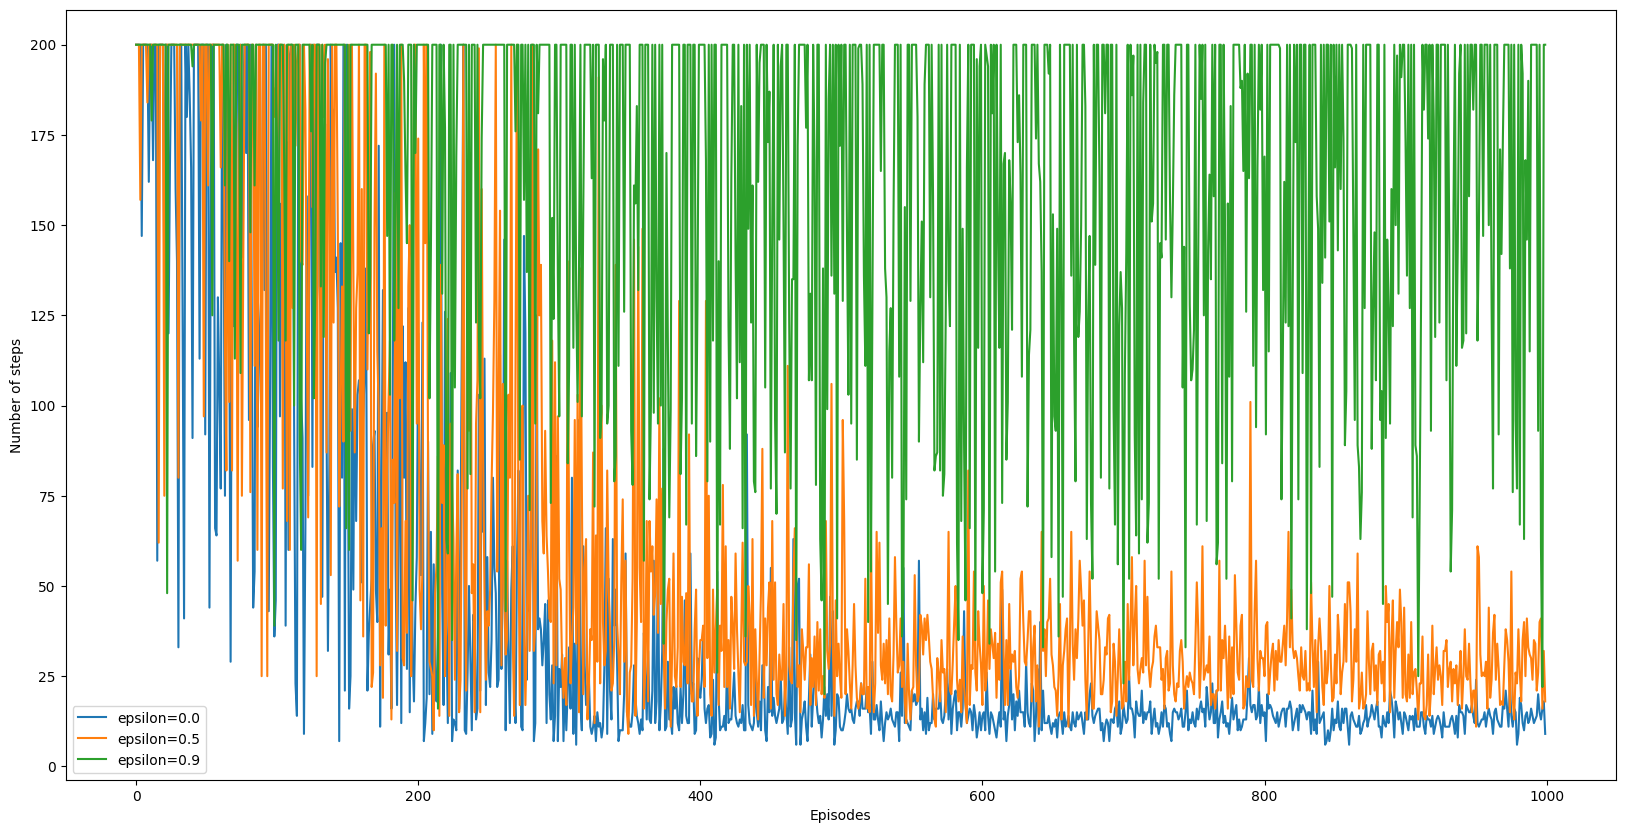

In [29]:
from mushroom_rl.core import Environment
from mushroom_rl.policy import EpsGreedy
from mushroom_rl.algorithms.value import QLearning
from mushroom_rl.utils.dataset import compute_J
from mushroom_rl.utils.parameters import Parameter
from mushroom_rl.core import Core
from mushroom_rl.utils.callbacks import CollectDataset
from mushroom_rl.utils.callbacks.callback import Callback
from mushroom_rl.utils.dataset import parse_dataset, episodes_length

# number of executions
NBR_EPISODES = 1000 

env = Environment.make('Gym', 'Taxi-v3')

epsilons = [.0, .5, .9]

tests = []

for eps in epsilons:
    epsilon = Parameter(value=eps)
    pi = EpsGreedy(epsilon=epsilon)
    agent = QLearning(env.info, pi, learning_rate=Parameter(value=.3))
    
    collect_dataset = CollectDataset()
    callbacks = [collect_dataset]
    
    core = Core(agent, env, callbacks_fit=callbacks)
    core.learn(n_episodes=NBR_EPISODES, n_steps_per_fit=1)
    
    res = {}
    res['nbr_steps'] = episodes_length(collect_dataset.get())
    tests.append(res)
    

plt.figure(figsize=(20,10))
for i, test in enumerate(tests):
    plt.plot(test['nbr_steps'], label='epsilon=' + str(epsilons[i]))
plt.xlabel('Episodes') 
plt.ylabel('Number of steps') 
plt.legend()
plt.show()

**\[Q1\]: Analyze the results:**

1. Why can't the algorithm with more exploration minimize the number of steps after several sessions (episodes) ?
2. Why there are episodes that have a minimal number of steps especially in the last episodes (always in the algorithm with more exploration) ?
3. Why does the one with only exploitation take less steps in each episode ?
4. In this case, what is the purpose of the exploration ?

[A1:Begin]

**Answer 01**

1. The algorithm with more exploration (epsilon=0.9) can't minimize steps consistently because it's deliberately choosing random actions 90% of the time. Even after learning good policies, it continues to explore random actions rather than exploiting known good paths.
2. The random exploration happens to choose a near-optimal sequence of actions. During the 10% of times when it exploits, it uses the learned optimal policy
This explains occasional low step count dips even with epsilon=0.9, but they're not consistent since the next episode will likely go back to exploration.
3. The exploitation-only policy (epsilon=0.0) takes fewer steps because once it learns a working path, it sticks to it and never deviates to explore alternatives. However, this doesn't guarantee it has found the optimal solution - just a working one that it discovered early on.
4. Discover potentially better solutions that pure exploitation might miss. Learn a more complete model of the environment. Avoid getting stuck in local optima. Learn multiple viable paths rather than just one.

[A1:End]

### II.2. Learning rate

In this last part, we will investigate the effect of the learning rate on the number of iterations.

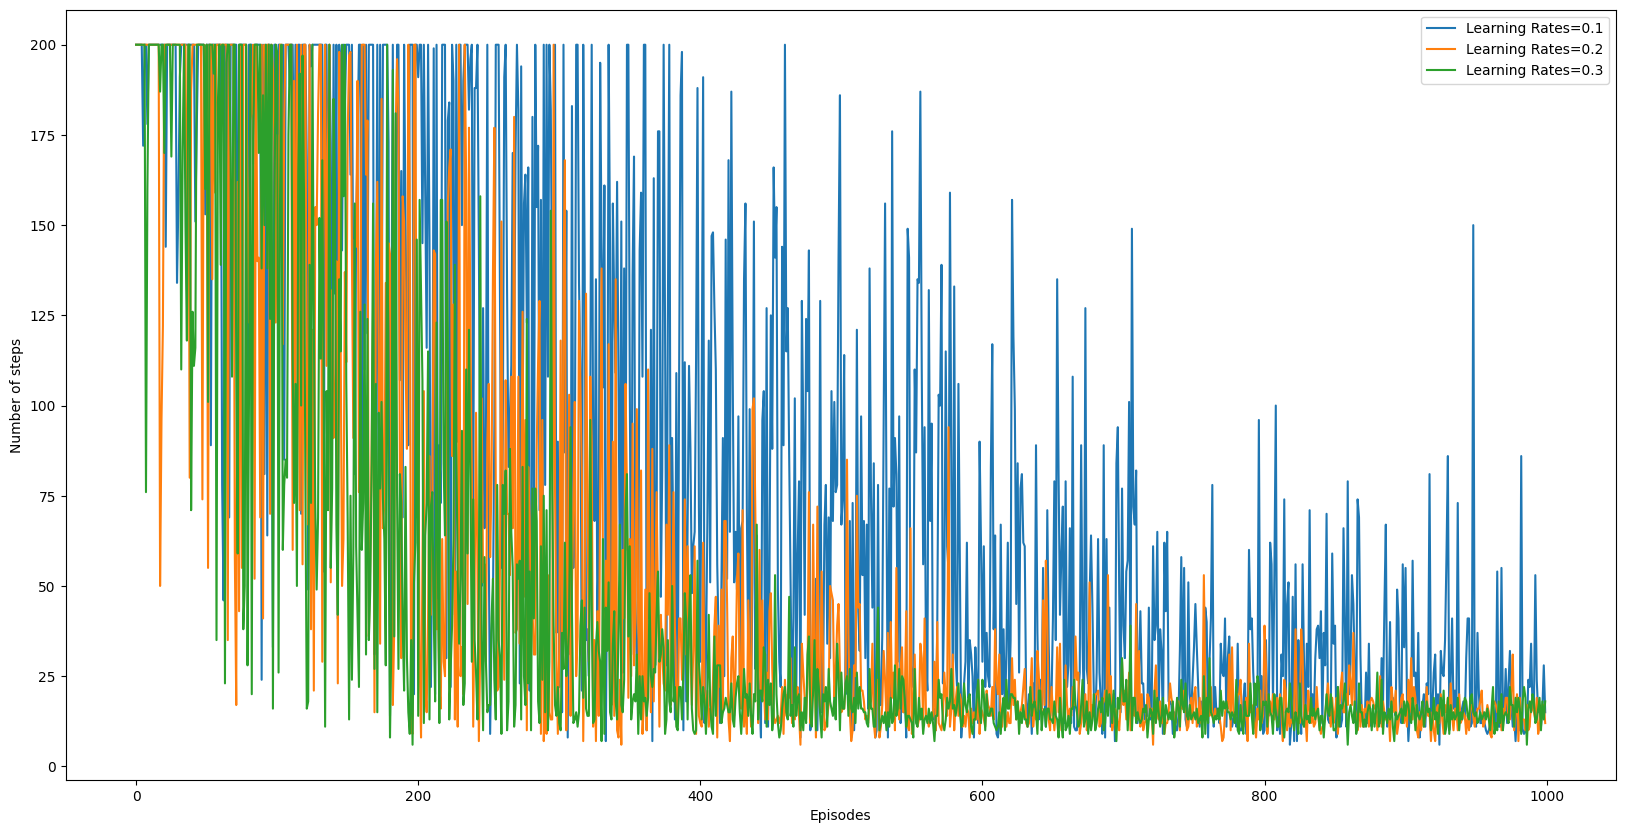

In [30]:
# number of executions
NBR_EPISODES = 1000

env = Environment.make('Gym', 'Taxi-v3')

lrs = [.1, .2, .3]

tests = []

for lr in lrs:
    epsilon = Parameter(value=0.1)
    pi = EpsGreedy(epsilon=epsilon)
    agent = QLearning(env.info, pi, learning_rate=Parameter(value=lr))
    
    collect_dataset = CollectDataset()
    callbacks = [collect_dataset]
    
    core = Core(agent, env, callbacks_fit=callbacks)
    core.learn(n_episodes=NBR_EPISODES, n_steps_per_fit=1)
    
    res = {}
    res['nbr_steps'] = episodes_length(collect_dataset.get())
    tests.append(res)
    

plt.figure(figsize=(20,10))
for i, test in enumerate(tests):
    plt.plot(test['nbr_steps'], label='Learning Rates=' + str(lrs[i]))
plt.xlabel('Episodes') 
plt.ylabel('Number of steps') 
plt.legend()
plt.show()

**\[Q2\]: Analyze the results:**

- What is the effect of $\alpha$ on the number of steps after each $n$ episodes ?

[A2:Begin]

**Answer 02**

1. The highest learning rate (alpha=0.3) shows the fastest convergence and maintains relative stability in later episodes, demonstrating strong overall performance.
2. The medium learning rate (alpha=0.2) converges more slowly but eventually reaches similar performance levels as alpha=0.3.
3. The lowest learning rate (alpha=0.1) converges slowly and shows poor stability in later episodes, with frequent spikes in step count.
4. Both alpha=0.3 and alpha=0.2 show better initial performance despite instability, while alpha=0.1 consistently performs worse throughout the training process.

[A2:End]

**\[Q3\]: Analyze the results:**

Looking at this diagram and the one before, we can notice that :
- The evolution with $\epsilon=0$ is almost like the one with $\alpha=0.3$ 
- and the evolution with $\epsilon=0.5$ is almost like the one with $\alpha=0.1$. 

In this case, can we say that there is a direct relation between the two parameters (in other words, can we replace one othe them as a function of the other) ? if yes, can you explain that ?

[A3:Begin]

**Answer 03**

 - These parameters serve fundamentally different purposes: epsilon controls the balance between exploring new actions vs exploiting known good actions, while alpha controls how much new experiences update existing knowledge in the Q-table.
 - The similar patterns we observe are coincidental to this specific environment and task rather than indicating any fundamental relationship between the parameters.

[A2:End]